# 淺度機器學習作品一：主成分分析的原理與實驗

### 學號 : 411072054 <br> 姓名 : 黃暐宸

## 作品目標：<br> 
本作品的目標是介紹主成分分析的原理，並以習題1和習題2具體呈現實驗過程:

Part 1 : 主成分分析的原理與介紹 
簡單介紹主成分分析的原理，並說明「為什麼要使用主成分分析?」和 「主成分分析如何把資料化簡為繁?」，讓讀者可以對主成分分析有最初步的理解。

Part 2 & Part 3 : 習題1分析一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，習題2分析一組關於乳癌患者腫瘤的影像量測資料，透過繪製變數間的相關係數圖和盒鬚圖了解資料。進行主成分分析，並透過散佈圖的方式觀察PCA的分群狀況，也透過更換不同主成分觀察之間的變化，此外，也繪製立體圖並調整角度找出最好的分辨視野。最後討論 Z1 與 Z2 中的原變數的重要性，還有與相關係數之間的關係。

目標:透過兩個簡單的數據和簡易的PCA操作，了解PCA背後的原理。


# Part 1 : 主成分分析(PCA)的原理與介紹

### (1) 甚麼是主成分分析?

主成分分析(Principal Components Analysis, PCA)，指計算主成分以及使用主成分來分析資料的過程，屬於一種降低維度(dimension reductoin) 的統計方法，利用較少的變數來代表原本資料大部分的訊息。<br><br>
主要概念：將資料旋轉或投影，找到新的變數代表資料中最多的變異，且新的變數之間互相獨立。

### (2) 為什麼要使用主成分分析?

當要觀察多個變數間的相關性時，無法透過散佈圖和立體圖等視覺方法觀察，而且變數之間實存在著相依性，某些變數的影響程度卻非常微小，要計算變數間的相關係數就會變得非常困難。因此，就需要透過多變量分析來處理，本次作品正是要使用多變量分析中十分有名的「主成分分析」方法，簡化多個變數的資料複雜資料，找出真正的核心資訊。

### (3) 主成分分析如何把資料化簡為繁?

因為主成分分析可以用來分析資料間的相關性，分析後有機會發現某些變數間的相關性，進而減少需要調查的項目，或是可以產生一組數量較原變數少的新變數，而這個過程就叫做「降維」，透過降維，能在保留大部分訊息的狀況下，有效降低變數的總數量。

因此，主成分分析試圖以最少的變數代表原始資料最大的「成分」，其原則如下：
1. 新變數為原變數的線性組合。
2. 保留原變數間的最大變異量（variance）。

# Part 2 : 習題 1<br>有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。

載入資料並標準化：(ratings是未標準化的 numpy array, ratings_是標準化後的 numpy array)
1. 使用 pandas 的 read_excel 函數讀取名為 'Wine.xlsx' 的 Excel 文件，並將其內容存儲在 DataFrame 對象 df 中。
2. 將數據轉換為 numpy 數組。
3. 初始化一個 StandardScaler 物件。StandardScaler 是 sklearn.preprocessing 套件中的一種工具，用於實現特徵的標準化，即將特徵數據轉換為均值為 0，標準差為 1 的形式。
4. 使用 fit 方法將 StandardScaler 物件適配到數據上。這一步會計算數據的均值和標準差，以便後續的轉換。
5. 使用 transform 方法將數據轉換（標準化）。這一步會將數據減去均值，然後除以標準差，從而實現標準化。轉換後的數據存儲在 ratings_ 中。

In [182]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


df = pd.read_excel('Wine.xlsx')

ratings = np.array(df)

scaler = StandardScaler()

scaler.fit(ratings)

ratings_ = scaler.transform(ratings)

1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性

程式碼說明 : 
1. 創建一個 pandas DataFrame，列名是特徵名稱，數據是標準化後的數據。
2. 計算 DataFrame 中各特徵間的相關矩陣。
3. 生成一個遮罩，隱藏相關矩陣的上三角部分，因為相關矩陣是對稱的，只需看其中一半。
4. 使用 seaborn 繪製熱力圖，顏色表示各特徵間的相關係數，上三角部分被遮罩隱藏。

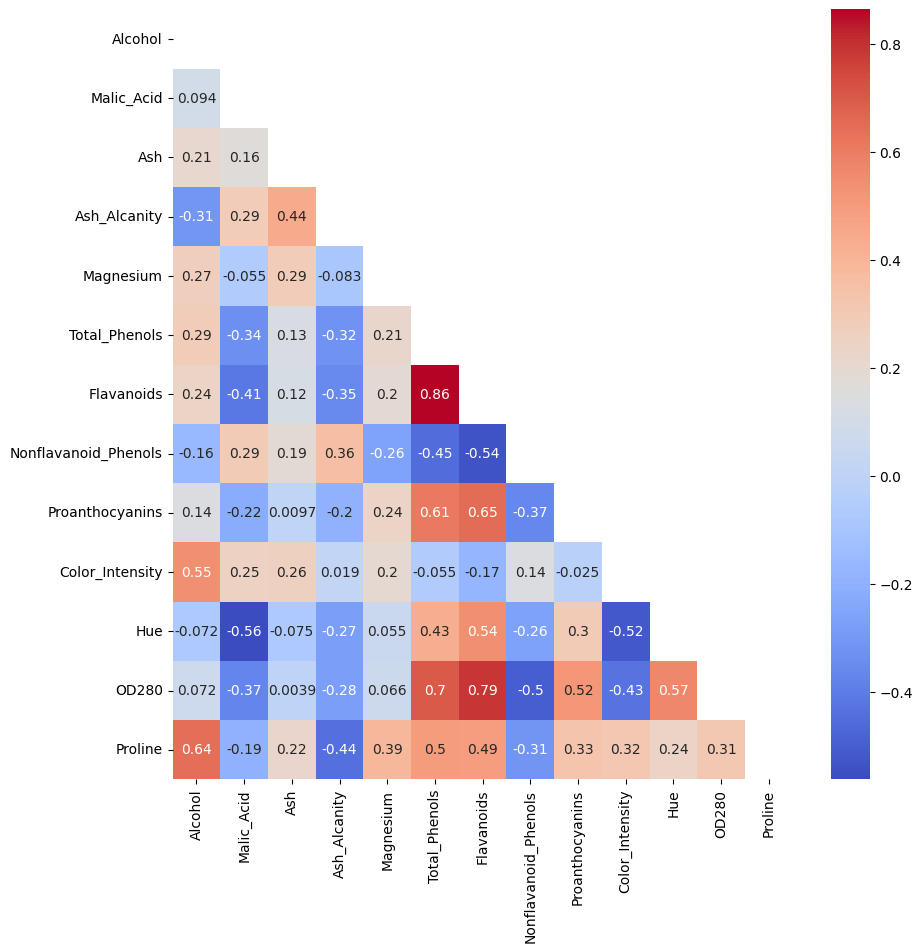

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn.preprocessing import StandardScaler

labels = df.columns

plt.figure(figsize=(10, 10))

R = df.drop(columns='Customer_Segment').corr()

mask = np.triu(np.ones_like(R, dtype=bool))

seaborn.heatmap(R, annot=True, cmap='coolwarm', mask=mask)

plt.show()

圖表觀察 :
1. 「Falvanoids」 和 「Total_phenols」 兩者的相關性最高，高達0.86
2. 「OD280」 和 「Falvanoids」 兩者的相關性高達0.79
3. 「OD280」 和 「Total_phenols」 兩者的相關性高達0.7

### 2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考

如果數據集中的變數具有不同的量級或者變數之間的尺度差異很大，那麼尺度大的變數可能會主導PCA結果，因為它們具有更大的變異數。這可能會導致PCA忽視尺度小但可能同樣重要的變數。

標準化前

程式碼說明 :　
1. 獲取特徵名稱。
2. 創建一個新的 matplotlib 圖形和軸。
3. 定義箱形圖和異常值的視覺屬性。
4. 使用 ax.boxplot 繪製每個特徵的箱形圖，並將其標籤設為相應的特徵名稱。箱形圖是水平的（vert = False）。
5. 設置 x 軸的標籤為 'Values'。
6. 使用未標準化數據(ratings)
7. 暫時移除'Customer_Segment'，因為這不是數據中的13種化學成分原變數，是標籤資料。

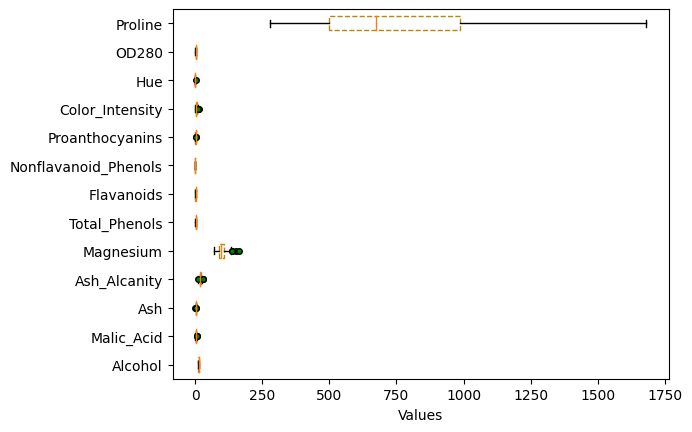

In [144]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Remove 'Customer_Segment' from ratings and categories
ratings = df.drop(columns='Customer_Segment').values
categories = df.drop(columns='Customer_Segment').columns

fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

圖表觀察 :

從以上的盒鬚圖可知，「Proline」值的尺度範圍大，從最小值200多到最大值接近1750，和其他變數值的尺度差很多，因此此數據需要標準化，不然會影響尺度小但可能同樣重要的變數。

標準化後

通過對數據進行標準化（即將每個變數轉換為均值為0，標準差為1的形式），我們可以確保PCA是在所有變數的共同尺度上進行的，這樣就不會偏向於尺度大的變數。這就是為什麼在進行PCA之前通常需要標準化數據的原因。

程式碼說明 :　
1. 獲取特徵名稱。
2. 創建一個新的 matplotlib 圖形和軸。
3. 定義箱形圖和異常值的視覺屬性。
4. 使用 ax.boxplot 繪製每個特徵的箱形圖，並將其標籤設為相應的特徵名稱。箱形圖是水平的（vert = False）。
5. 設置 x 軸的標籤為 'Values'。
6. 使用未標準化數據(ratings_)
7. 暫時移除'Customer_Segment'，因為這不是數據中的13種化學成分原變數，是標籤資料。

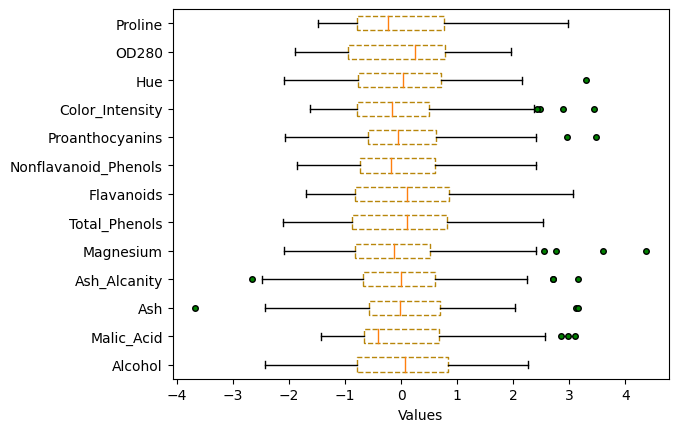

In [145]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


ratings = df.drop(columns='Customer_Segment').values
scaler = StandardScaler() # 計算待會標準化所需的平均值和標準差
scaler.fit(ratings) # 對數據集進行轉換（標準化）
ratings_ = scaler.transform(ratings) # 將數據集轉換成 DataFrame

categories = df.drop(columns='Customer_Segment').columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

圖表觀察 :

標準化後，可以從圖表觀察到，所有變數都在共同尺度上進行的，所有變數的平均值大約都落在0上，可以進行PCA。

### 3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot

程式碼說明 : 

1. 使用 StandardScaler 對數據集 ratings_ 進行標準化，使得每個特徵的平均值為0，標準差為1。

2. 計算標準化後的數據集的共變異數矩陣 Sx。這裡使用了 numpy 的 np.cov 函數，並且設置 bias=False 來進行無偏估計。

3. 手動計算共變異數矩陣 Sx_formula。首先計算樣本數 N 和樣本的平均值 mu_x，然後計算樣本與平均值的差 Tmp，最後用 Tmp 的轉置與 Tmp 的矩陣乘積除以 N-1 得到共變異數矩陣。

4. 計算共變異數矩陣的特徵值和特徵向量 w, v，並對特徵值進行降序排序，得到排序後的特徵值 eigvals 和對應的特徵向量 eigvecs。

5. 重新構造共變異數矩陣 Sigma_x，這裡使用了特徵向量矩陣、特徵值的對角矩陣和特徵向量矩陣的轉置的矩陣乘積。

6. 繪製 Scree plot，顯示每個主成分的特徵值。

7. 繪製 Variance Explained 圖表，顯示每個主成分解釋的變異數比例和累積解釋的變異數比例。

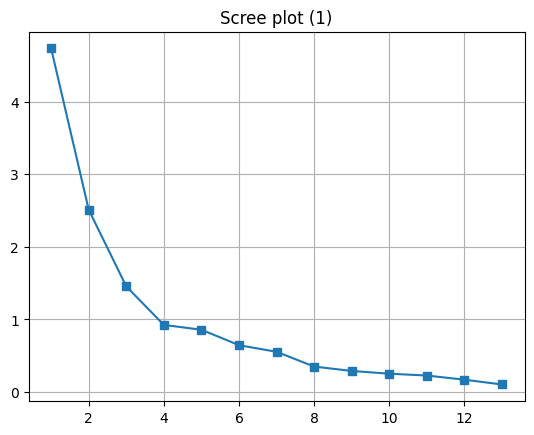

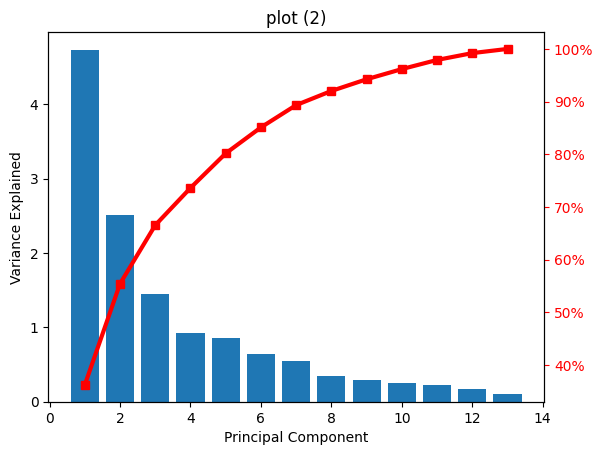

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from matplotlib.ticker import PercentFormatter

# 使用 numpy 的 np.cov 函數直接計算共變異數矩陣
Sx = np.cov(ratings_.T, bias=False)

#手動計算共變異數矩陣
N = ratings_.shape[0] # 計算樣本數
mu_x = np.mean(ratings_, axis=0) # 計算樣本的平均值
Tmp = ratings_ - mu_x # 計算樣本與平均值的差
Sx_formula = Tmp.T @ Tmp / (N - 1) # 計算樣本的共變異數矩陣

w, v = eig(Sx_formula) # 計算共變異數矩陣的特徵值和特徵向量
idx = np.argsort(-w) # 對特徵值進行降序排序
eigvals = w[idx] # 排序後的特徵值
eigvecs = v[:, idx] # 排序後的特徵向量
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T # 重新構造共變異數矩陣

plt.figure()
x = np.arange(1, 1+len(eigvals)) # 生成特徵值的索引
plt.plot(x, eigvals, marker='s') # 繪製特徵值的大小
plt.title('Scree plot (1)') # 設置圖表標題
plt.grid(True) # 顯示網格
plt.show()

fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('plot (2)')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

圖表觀察 : 

1. Scree plot 是一種用於主成分分析，用於展示每個主成分解釋的變異數。在這個圖中，主成分按照他們的解釋變異數大小排序，並且繪製在 y 軸上，x 軸則是主成分的數量。由 Scree plot (1) 可知前幾個主成分解釋了大部分的變異數，然後後面幾個主成分的解釋變異數迅速下降，形成一個彎曲的形狀。

2. 由 Scree plot (2) 可已看到累積的解釋變異數，一開始的主成分解釋了大部分的變異數，因此紅線急速上升，然後漸漸變得平緩。

### 4. 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖四（左）。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

分別定義出主成分['z1']和主成分['z2']

In [147]:
# 假設 eigvecs 是一個二維數組，其中每一列是一個主成分
principal_components = {f'z{i+1}': eigvecs[:, i] for i in range(eigvecs.shape[1])} 

print(principal_components['z1'])
print(eigvecs[:, 0])
print(principal_components['z2'])
print(eigvecs[:, 1])


[-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
 -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
 -0.28675223]
[-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
 -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
 -0.28675223]
[ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]
[ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]


未標準化

程式碼說明:
1. 使用 @ 運算符（在 NumPy 中表示矩陣乘法）將原始數據 c_data 投影到第一主成分 z1 和第二主成分 z2 上。結果分別存儲在 projected_data_z1 和 projected_data_z2 中。
2. 使用 plt.scatter 繪製散點圖，其中 x 軸是投影到第一主成分的數據，y 軸是投影到第二主成分的數據。

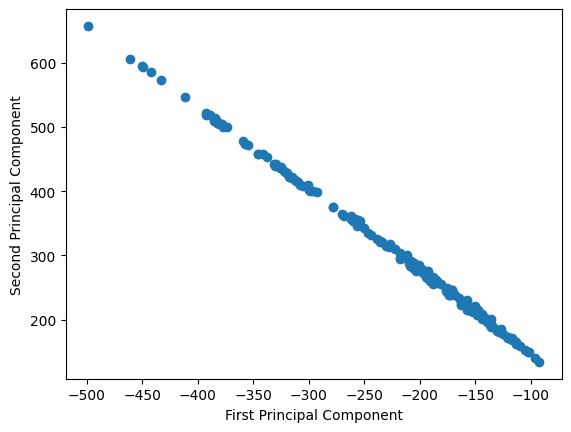

In [148]:
import matplotlib.pyplot as plt

# 將原始數據投影到主成分所定義的新空間中
projected_data_z1 = ratings @ principal_components['z1']
projected_data_z2 = ratings @ principal_components['z2']

# 繪製分群結果，使用原始標籤作為顏色
plt.scatter(projected_data_z1, projected_data_z2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

圖表觀察 : 
在圖表上完全看不出分群的狀況，都擠在一條線上，原因是因為資料未標準化，某些數值的尺度太大了，影響其他變數的重要性，這就是為什麼要標準化。

標準化

程式碼說明:
1. 使用 @ 運算符（在 NumPy 中表示矩陣乘法）將原始數據 ratings_投影到第一主成分 z1 和第二主成分 z2 上。結果分別存儲在 projected_data_z1_ 和 projected_data_z2_ 中。
2. 使用 plt.scatter 繪製散點圖，其中 x 軸是投影到第一主成分的數據，y 軸是投影到第二主成分的數據。
3. 使用標準化後的ratings_數據

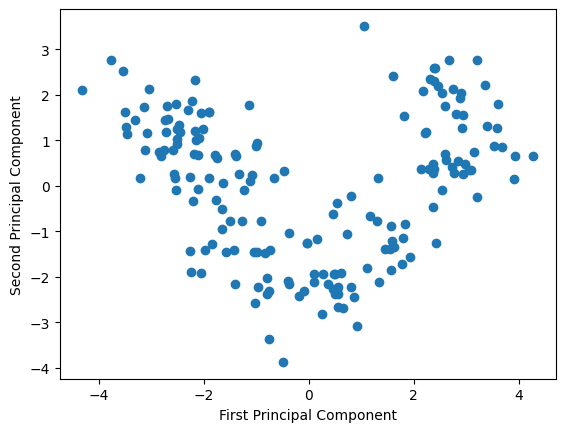

In [149]:
import matplotlib.pyplot as plt

projected_data_z1_ = ratings_ @ principal_components['z1']
projected_data_z2_ = ratings_ @ principal_components['z2']

# 繪製分群結果，使用原始標籤作為顏色
plt.scatter(projected_data_z1_, projected_data_z2_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

圖表觀察:
從圖表上看不太出來分群的狀況，但已經比剛剛的未標準化數據畫出來的散佈圖好很多了。

###  5. 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

程式碼說明 : 
1.  DataFrame df 中取出 Customer_Segment 列作為標籤。
2. 根據標籤值創建一個顏色列表。如果標籤為 1，顏色為藍色；如果標籤為 2，顏色為紅色；否則，顏色為綠色。
3. 添加圖例，每個圖例項目由一個 Line2D 物件表示，其中 marker='o' 指定標記的形狀，color='w' 指定線條的顏色，markerfacecolor 指定標記的顏色，markersize 指定標記的大小。
4. 選用數據在第一主成分和第二主成分上的投影(projected_data_z1_, projected_data_z2_)

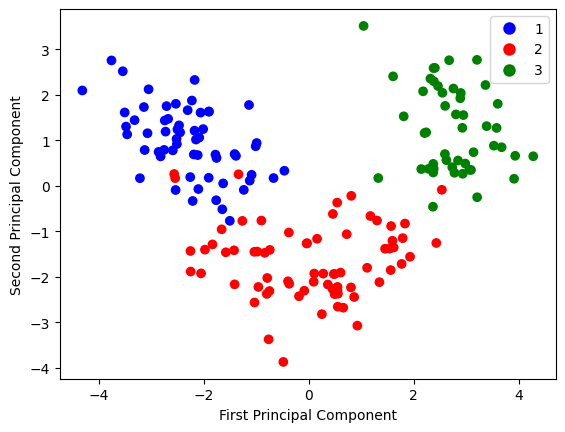

In [150]:

labels = df.Customer_Segment

# Define your own colors
colors = ['blue' if label == 1 else 'red' if label == 2 else 'green' for label in labels]

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z1_, projected_data_z2_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

圖表觀察 : 
從圖表可以發現，當選用數據在第一主成分和第二主成分上的投影，三群資料分得蠻開的，有效地識別出了數據中的不同群體，在主成分分析（PCA）降維後的空間中是清晰可見的。

程式碼說明 : 
1. 選用數據在第二主成分和第三主成分上的投影(projected_data_z2_, projected_data_z3_)
2. 將 ratings_ 數據與 principal_components['z3'] 進行乘法運算，找出據在第三主成分上的投影。

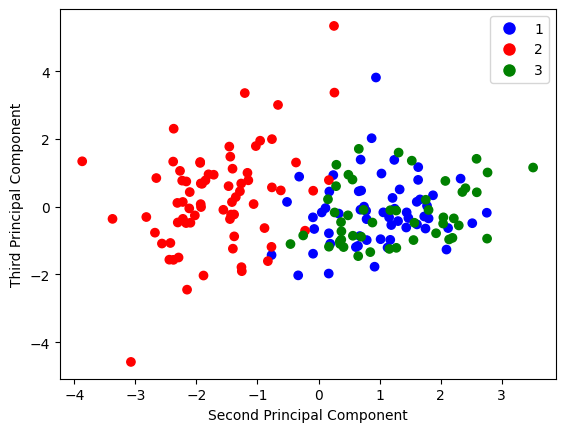

In [64]:
projected_data_z3_ = ratings_ @ principal_components['z3']

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z2_, projected_data_z3_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

圖表觀察 : 
從圖表可以發現，當選用數據在第二主成分和第三主成分上的投影，三群資料就擠在一起，只有紅色點比較分散一點。

程式碼說明 : 
1. 選用數據在第一主成分和第四主成分上的投影(projected_data_z1_, projected_data_z4_)
2. 將 ratings_ 數據與 principal_components['z4'] 進行乘法運算，找出據在第三主成分上的投影。

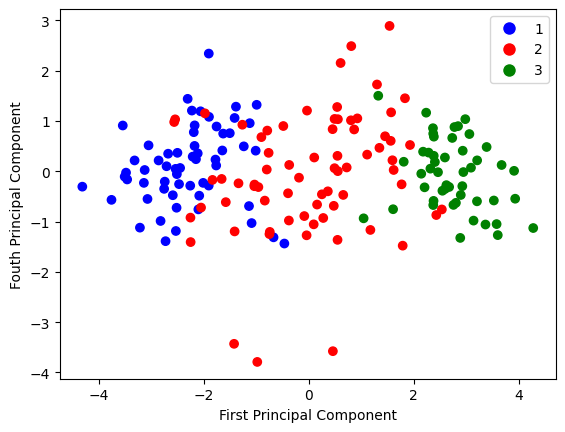

In [65]:
projected_data_z4_ = ratings_ @ principal_components['z4']

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z1_, projected_data_z4_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

plt.xlabel('First Principal Component')
plt.ylabel('Fouth Principal Component')
plt.show()

圖表觀察 : 
從圖表可以發現，當選用數據在第一主成分和第四主成分上的投影，三群資料分群分得還可以，這代表使用主成分一的效果很好。

### 6. 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

程式碼說明 : 
1. 從 mpl_toolkits.mplot3d 匯入 Axes3D：這是用於創建3D圖形的模組。
2. 創建一個3D子圖：使用 plt.figure 和 add_subplot 函數創建一個3D子圖。
3. 散點的 x、y 和 z 座標分別由 projected_data_z1_、projected_data_z2_ 和 projected_data_z3_ 給出，這些變量可能是數據在第一、第二和第三主成分上的投影。每個點的顏色由 labels 給出。
4. x 軸代表第一主成分，y 軸代表第二主成分，z 軸代表第三主成分。

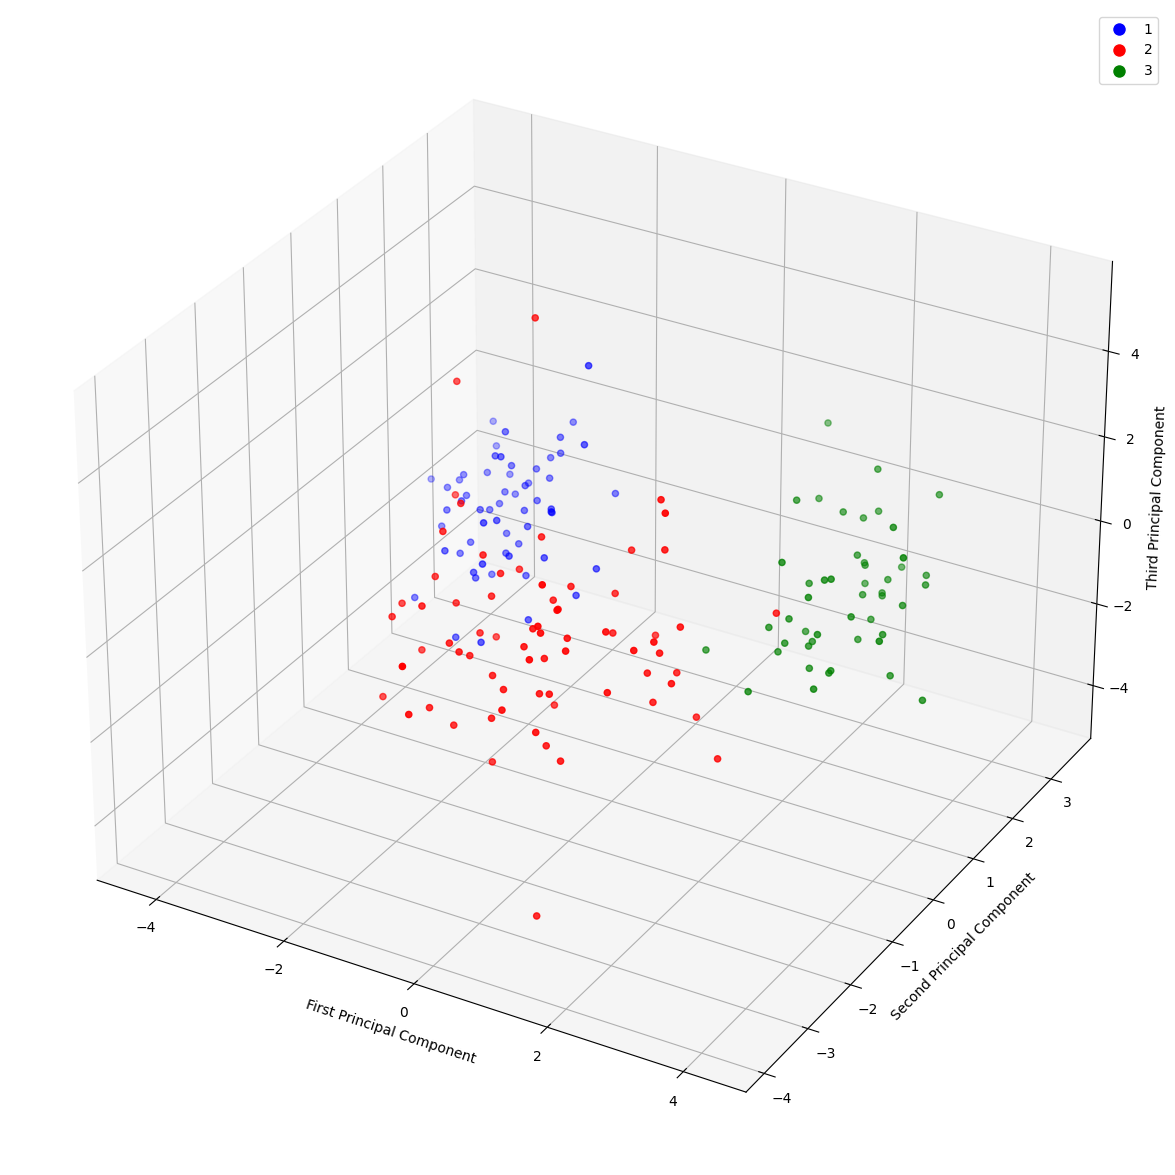

In [29]:
from mpl_toolkits.mplot3d import Axes3D

labels = df.Customer_Segment

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')


# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

圖表觀察 : 
採三個主成分，從3D的視角來看更能清楚的分辨三群，具有良好的辨識度，但有些部分重疊。

透過旋轉不同角度分辨群組

仰角20度，方位角45度

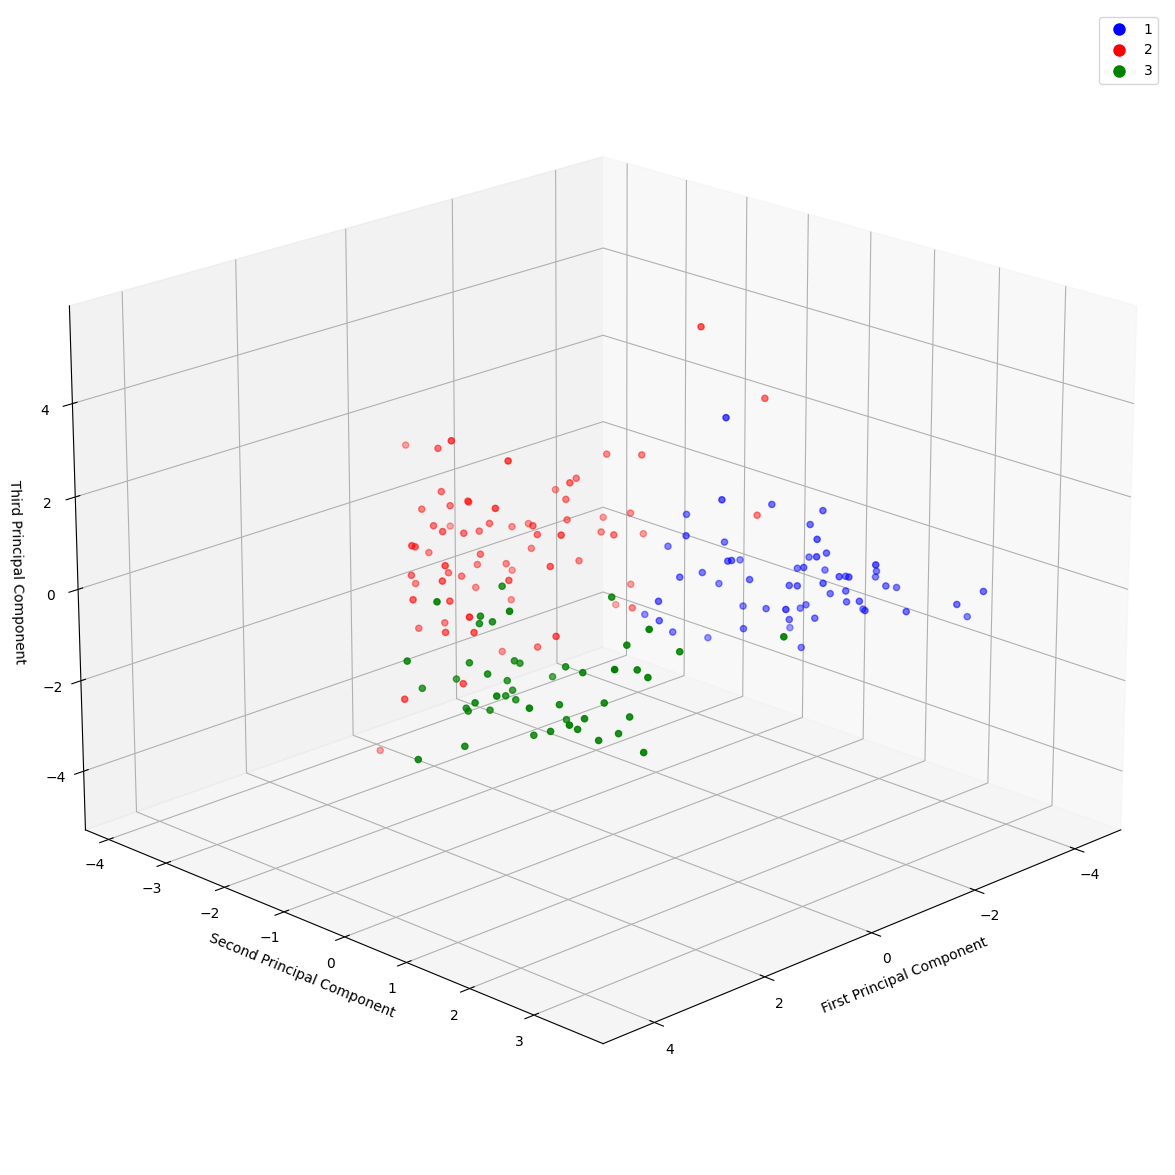

In [30]:
from mpl_toolkits.mplot3d import Axes3D

labels = df.Customer_Segment

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 改變視角
ax.view_init(elev=20, azim=45)  # elev是仰角，azim是方位角

plt.show()

圖表觀察:
仰角20度，方位角45度時，三群分的更開了，但紅色和綠色仍有交錯。

仰角90度，方位角90度

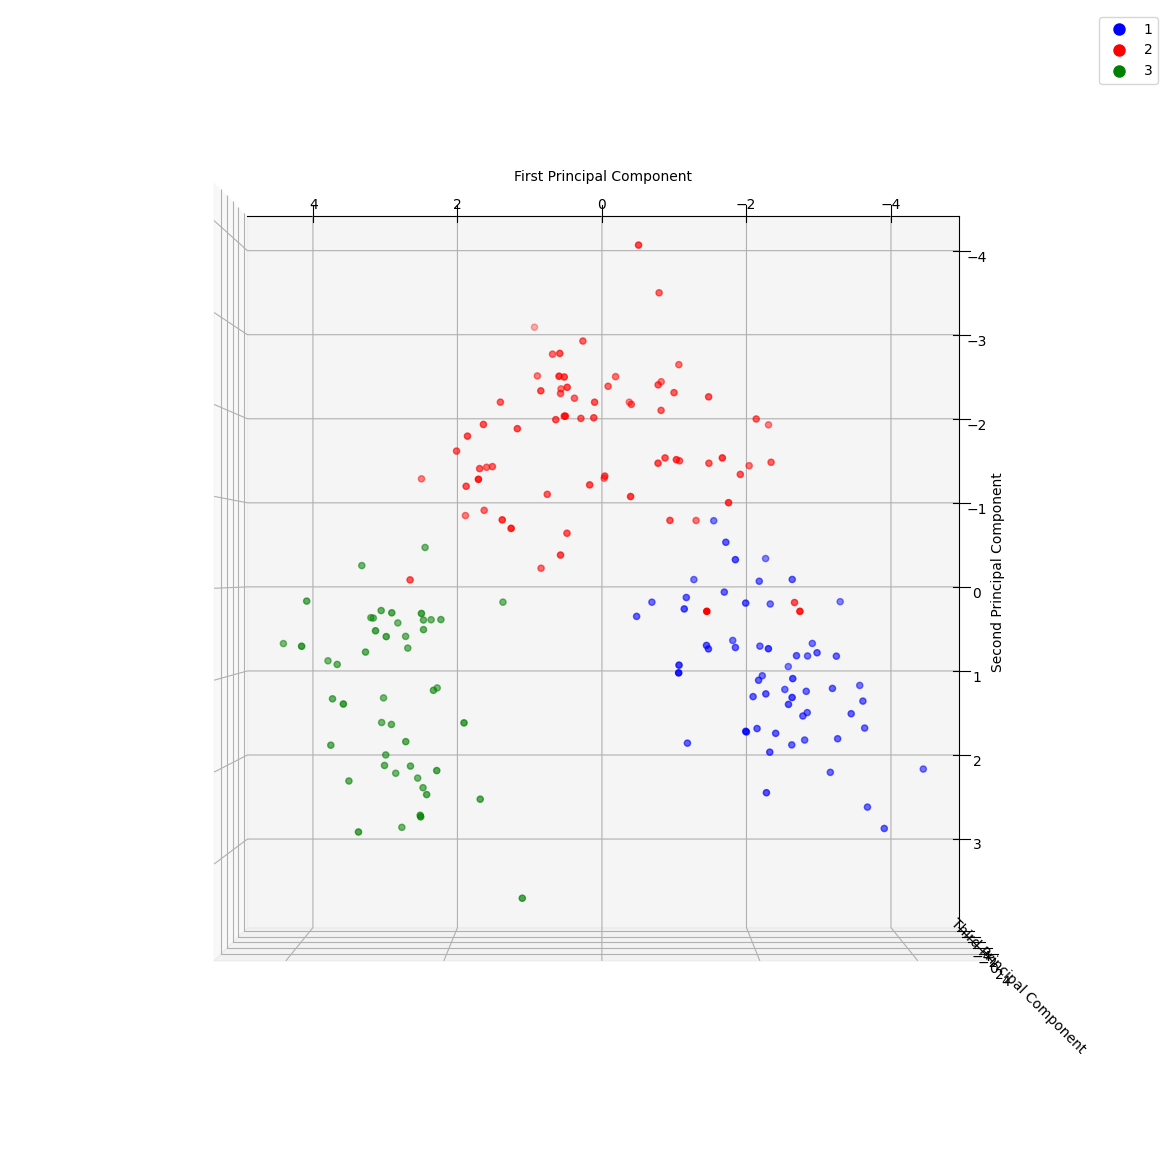

In [32]:
from mpl_toolkits.mplot3d import Axes3D

labels = df.Customer_Segment

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 改變視角
ax.view_init(elev=90, azim=90)  # elev是仰角，azim是方位角

plt.show()

圖表觀察:
仰角90度，方位角90度時，三群分的更開了，分群狀況更好了

仰角60度，方位角120度

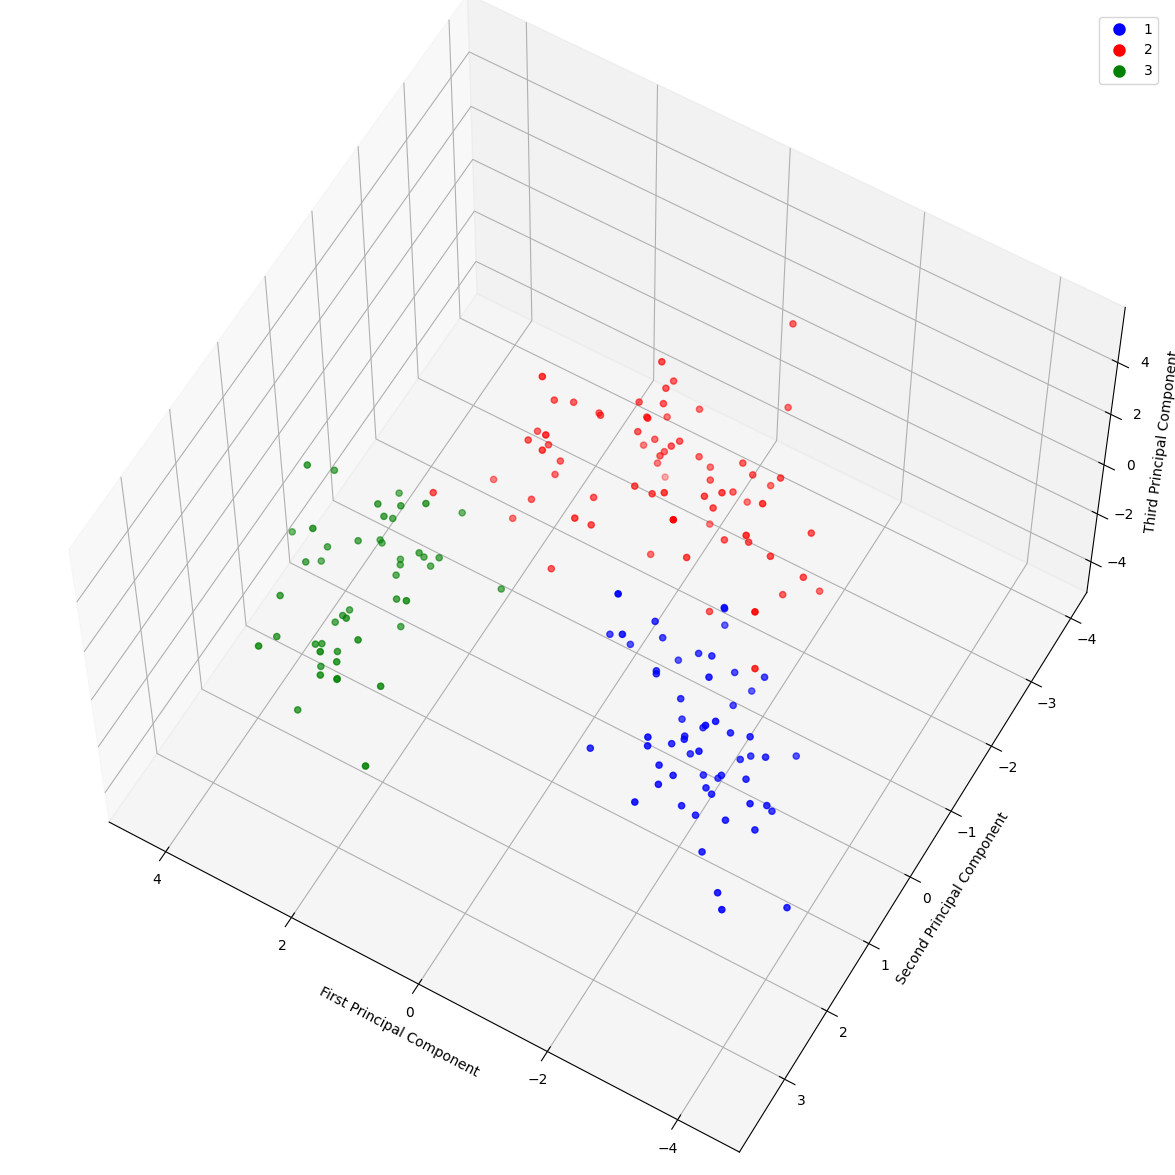

In [34]:
from mpl_toolkits.mplot3d import Axes3D

labels = df.Customer_Segment

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10), 
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['1', '2', '3'])

# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 改變視角
ax.view_init(elev=60, azim=120)  # elev是仰角，azim是方位角

plt.show()

圖表觀察:
仰角60度，方位角120度時，三群幾乎分開，是我測試多次的最佳結果。

### 7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

z1 是第一主成分，它的組成係數（即特徵向量的元素）表示原始數據在這個主成分上的投影。這些係數的絕對值越大，表示該原始特徵對該主成分的貢獻越大，即該特徵在該主成分上的變異性越大。因此組成係數的絕對值越大，表示對應的原始特徵在 z1 上的變異性越大，也就是說，這個特徵對 z1 的貢獻越大。

找出z1和z2最重要和最不重要的元素。

In [155]:

z1_index = np.argmax(np.abs(principal_components['z1']))
z2_index = np.argmax(np.abs(principal_components['z2']))

z1_index_min = np.argmin(np.abs(principal_components['z1']))
z2_index_min = np.argmin(np.abs(principal_components['z2']))

print(df.columns)
print(f"The most important feature for 'z1' is {df.columns[z1_index]} with value {principal_components['z1'][z1_index]}.")
print(f"The most important feature for 'z2' is {df.columns[z2_index]} with value {principal_components['z2'][z2_index]}.")


print(f"The least important feature for 'z1' is {df.columns[z1_index_min]} with value {principal_components['z1'][z1_index_min]}.")
print(f"The least important feature for 'z2' is {df.columns[z2_index_min]} with value {principal_components['z2'][z2_index_min]}.")

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')
The most important feature for 'z1' is Flavanoids with value -0.42293429671005917.
The most important feature for 'z2' is Color_Intensity with value 0.5299956720700431.
The least important feature for 'z1' is Ash with value 0.0020510614443709075.
The least important feature for 'z2' is Flavanoids with value -0.0033598121003076023.


再與原變數間的相關係數圖對照，是否透露相同的訊息

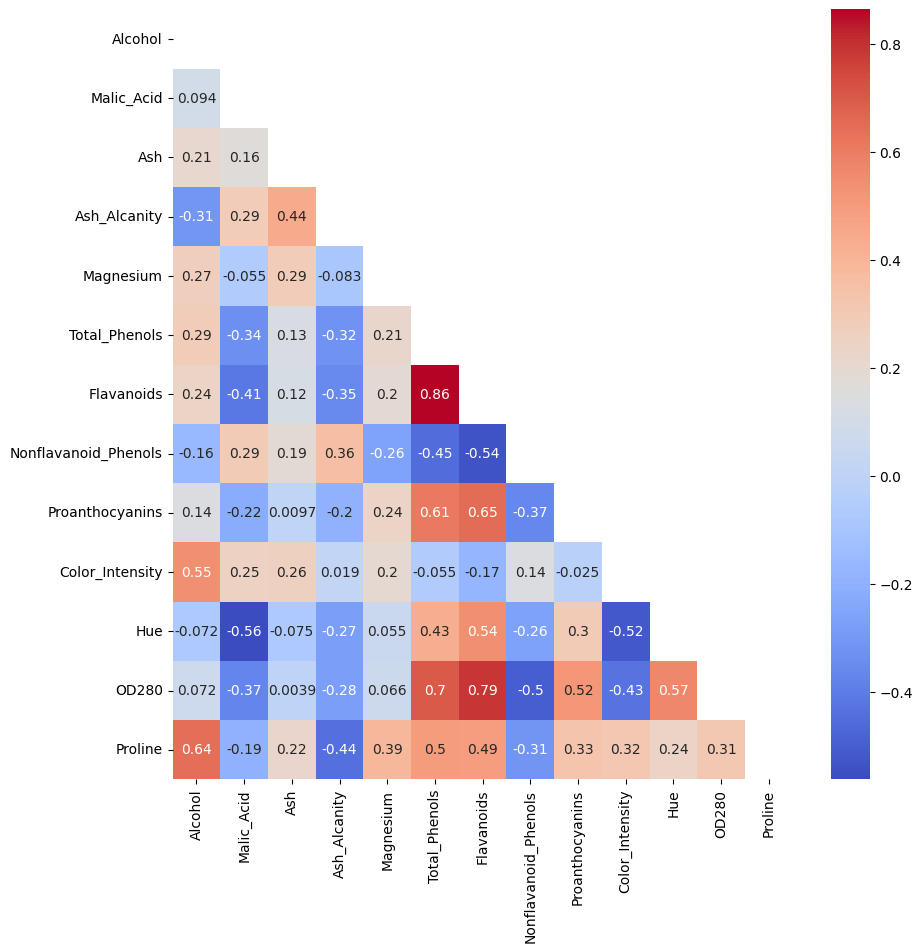

In [184]:

labels = df.columns

plt.figure(figsize=(10, 10))

R = df.drop(columns='Customer_Segment').corr()

mask = np.triu(np.ones_like(R, dtype=bool))

seaborn.heatmap(R, annot=True, cmap='coolwarm', mask=mask)

plt.show()

1. Flavanoids 是z1的最重要原變數，他和其他原變數相關係數絕對值大於等於0.6的有三個變數，代表和其他原變數之間的相關性算強。
2. Color_Intensity 是z2的最重要原變數，他和其他原變數相關係數絕對值大於等於0.6的都沒有，因此代表和其他原變數之間的相關性不算強。
3. Ash 是z2的最不重要原變數，他和其他原變數相關係數絕對值大於等於0.6的都沒有，因此代表和其他原變數之間的相關性不強。
4. Flavanoids 是z2的最不重要原變數，他和其他原變數相關係數絕對值大於等於0.6的有三個變數，代表和其他原變數之間的相關性算強。

猜測:主成分中的原變數的重要性，和與其他原變數之間的相關性，兩者之間並沒有實際關聯性

# Part 2 : 習題 2<br>回答類似習題 1 的問題（如下所述），資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。請注意，由於變數多，因此如前一練習的相關性圖，必須做些改變。

資料解釋 ：　<br>
乳癌資料集是一個經典且非常簡單的二元分類資料集，其中"M"類有212個樣本，"B"類有357個樣本，總共有569個樣本。每個樣本都有30個實數特徵，且所有特徵值都是正數。


載入資料(想知道第25, 99, 127的類別名稱)

In [160]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[25, 99, 127]]
list(data.target_names)
# print(data)

['malignant', 'benign']

'malignant'的編號是1, 'benign'的編號是2

數據的feature names

In [38]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


載入資料並標準化：(c_data是未標準化的 numpy array c_data_是標準化後的 numpy array)
1. 加載乳腺癌數據集。
2. 將數據轉換為 numpy 數組。
3. 初始化一個 StandardScaler 物件。StandardScaler 是 sklearn.preprocessing 套件中的一種工具，用於實現特徵的標準化，即將特徵數據轉換為均值為 0，標準差為 1 的形式。
4. 使用 fit 方法將 StandardScaler 物件適配到數據上。這一步會計算數據的均值和標準差，以便後續的轉換。
5. 使用 transform 方法將數據轉換（標準化）。這一步會將數據減去均值，然後除以標準差，從而實現標準化。轉換後的數據存儲在 c_data_ 中。

In [161]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Convert the data to a numpy array
c_data = np.array(data.data)

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(c_data)

# Transform the data
c_data_ = scaler.transform(c_data)

### 1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性

程式碼說明 : 
1. 創建一個 pandas DataFrame，列名是特徵名稱，數據是標準化後的數據。
2. 計算 DataFrame 中各特徵間的相關矩陣。
3. 生成一個遮罩，隱藏相關矩陣的上三角部分，因為相關矩陣是對稱的，只需看其中一半。
4. 使用 seaborn 繪製熱力圖，顏色表示各特徵間的相關係數，上三角部分被遮罩隱藏。

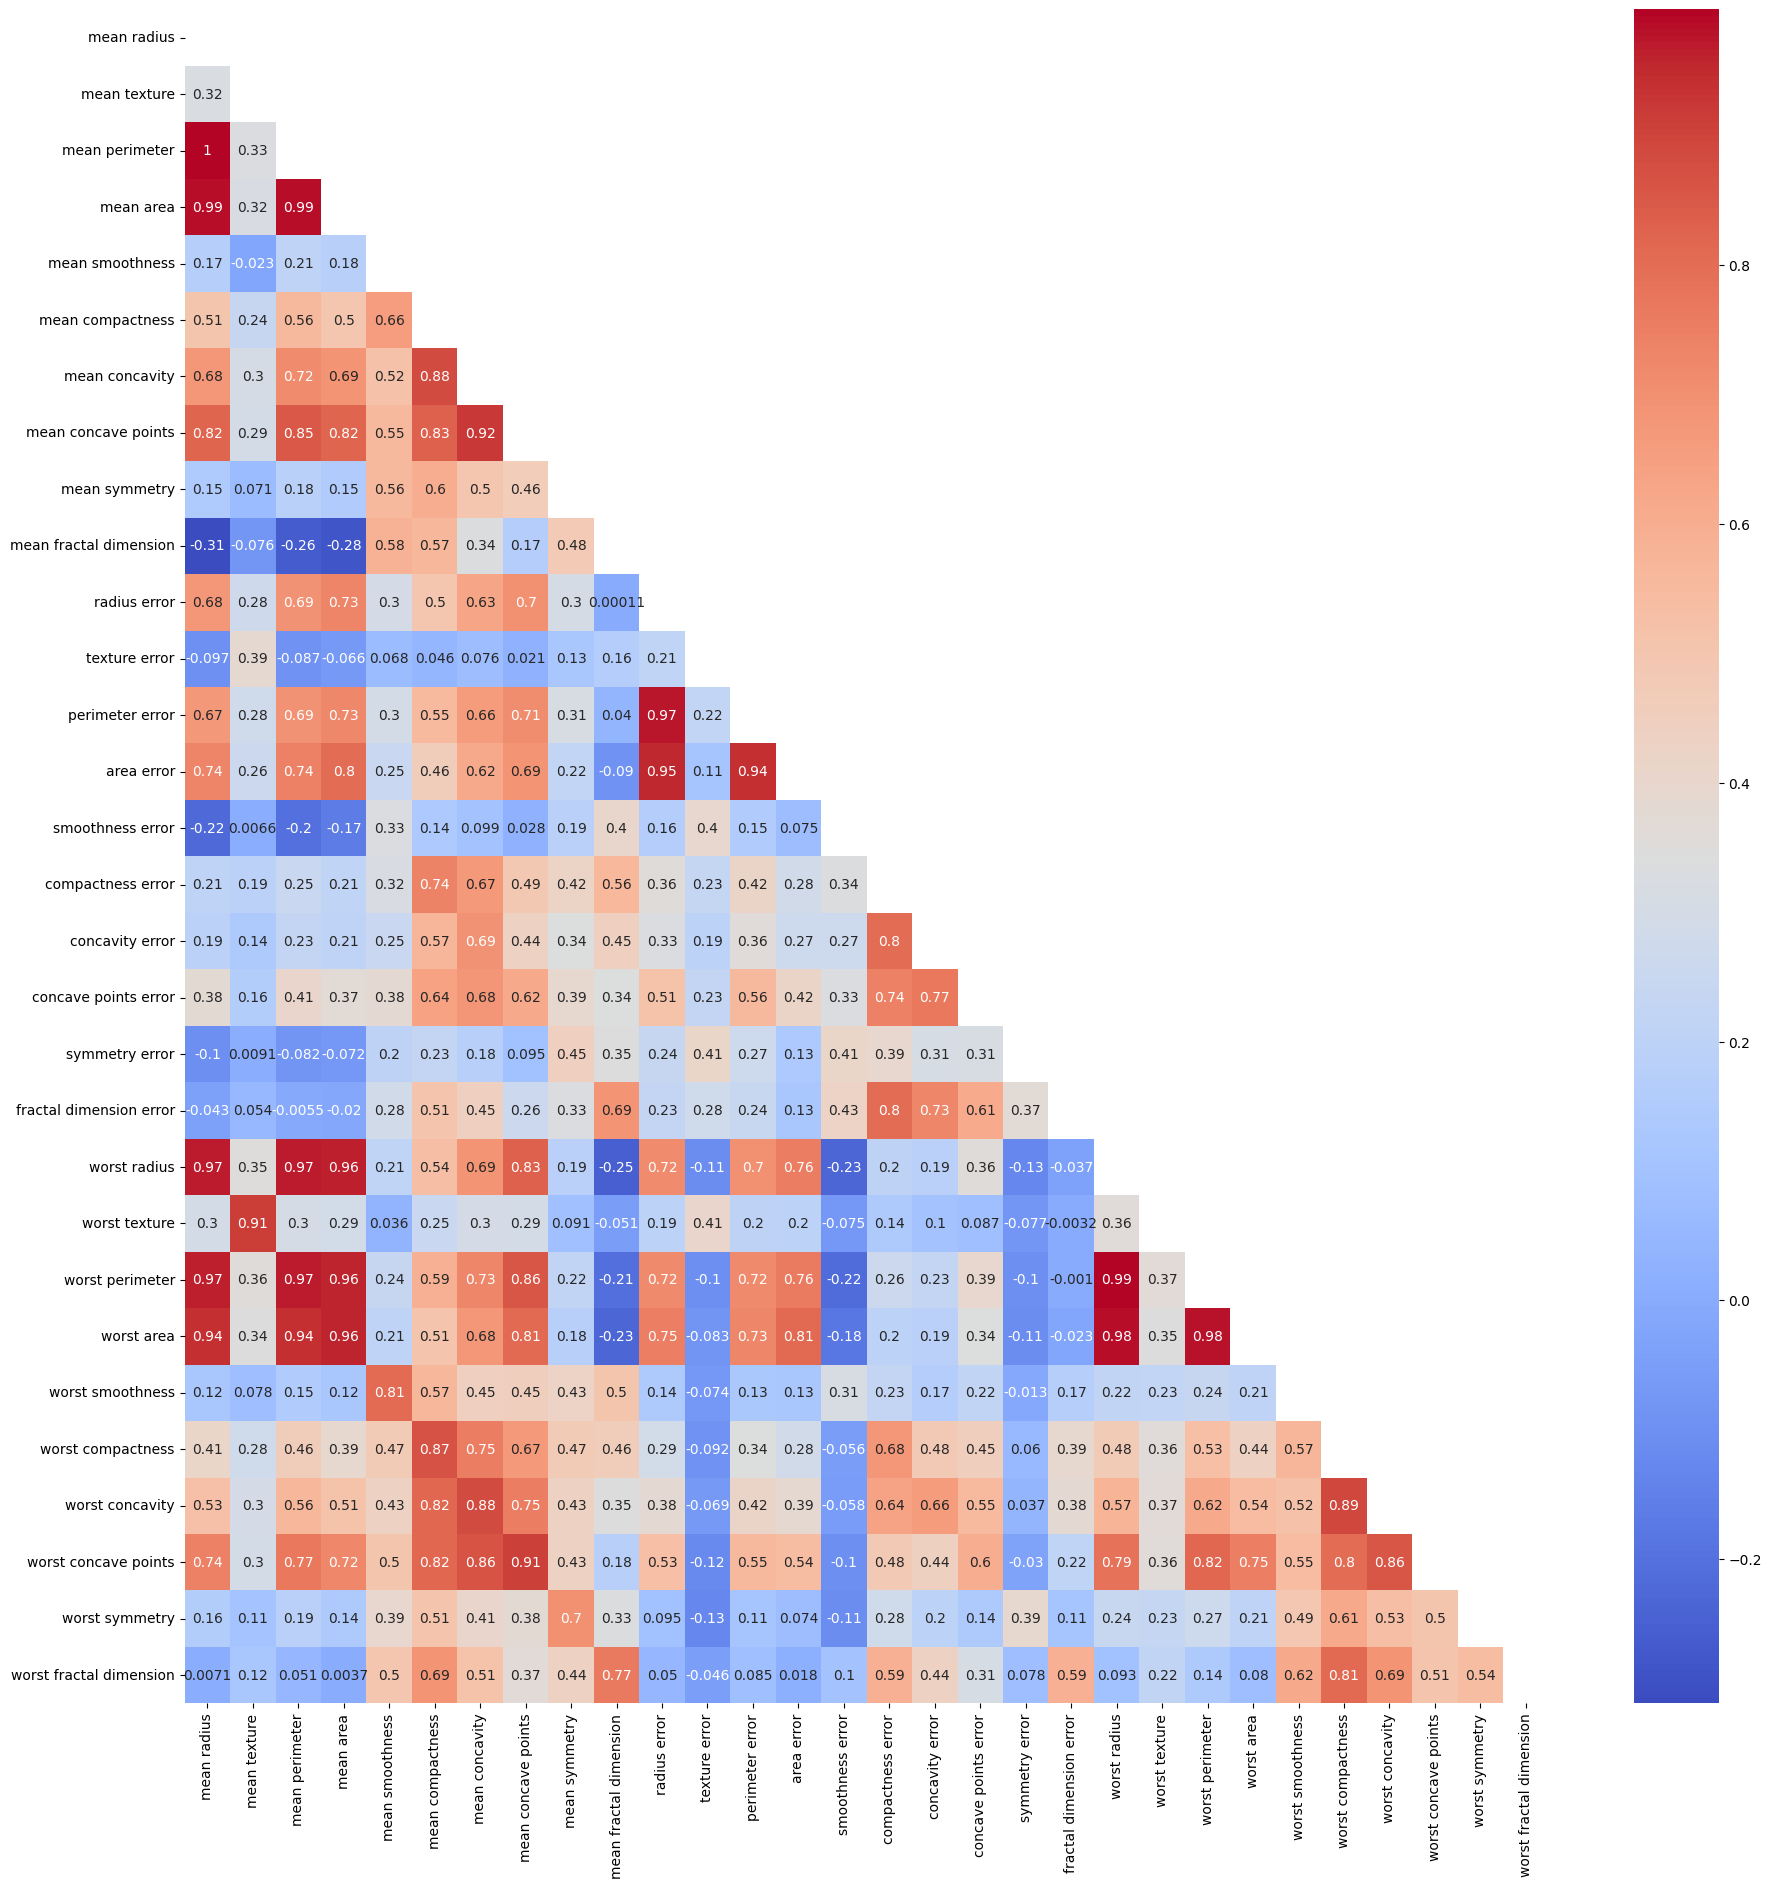

In [162]:
import seaborn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Get the feature names
labels = data.feature_names

plt.figure(figsize=(22, 22))

# Create a DataFrame with the feature names as column names
df = pd.DataFrame(c_data_, columns=labels)

# Compute the correlation matrix
R = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(R, dtype=bool))

# Draw the heatmap with the mask
seaborn.heatmap(R, annot=True, cmap='coolwarm', mask=mask)

plt.show()

圖表觀察 : 
1. 「mean perimeter」 和 「mean radius」 兩者的相關性最高，高達1
2. 由於變數眾多，因此圖表顯得有些雜亂。

改成找出所有原變數中相關性前五高的原變數作呈現

In [163]:
# Compute the correlation matrix
R = df.corr()

# For each variable...
for var in R.columns:
    # Get the 5 variables most correlated with the current variable
    top_corr = R[var].nlargest(6)  # We get 6 largest because the variable itself is included
    
    # Exclude the variable itself
    top_corr = top_corr.iloc[1:]
    
    print(f"Top 5 variables correlated with {var}:")
    print(top_corr)
    print("\n")

Top 5 variables correlated with mean radius:
mean perimeter     0.997855
mean area          0.987357
worst radius       0.969539
worst perimeter    0.965137
worst area         0.941082
Name: mean radius, dtype: float64


Top 5 variables correlated with mean texture:
worst texture      0.912045
texture error      0.386358
worst perimeter    0.358040
worst radius       0.352573
worst area         0.343546
Name: mean texture, dtype: float64


Top 5 variables correlated with mean perimeter:
mean radius        0.997855
mean area          0.986507
worst perimeter    0.970387
worst radius       0.969476
worst area         0.941550
Name: mean perimeter, dtype: float64


Top 5 variables correlated with mean area:
mean radius        0.987357
mean perimeter     0.986507
worst radius       0.962746
worst area         0.959213
worst perimeter    0.959120
Name: mean area, dtype: float64


Top 5 variables correlated with mean smoothness:
worst smoothness          0.805324
mean compactness          0.

### 2. 繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考（如上題繪製的兩張 Boxplot 圖, 一張針對原始資料，另一張則是標準化後的資料）。

未標準化

程式碼說明 :　
1. 獲取特徵名稱。
2. 創建一個新的 matplotlib 圖形和軸。
3. 定義箱形圖和異常值的視覺屬性。
4. 使用 ax.boxplot 繪製每個特徵的箱形圖，並將其標籤設為相應的特徵名稱。箱形圖是水平的（vert = False）。
5. 設置 x 軸的標籤為 'Values'。
6. 使用未標準化數據(c_data)

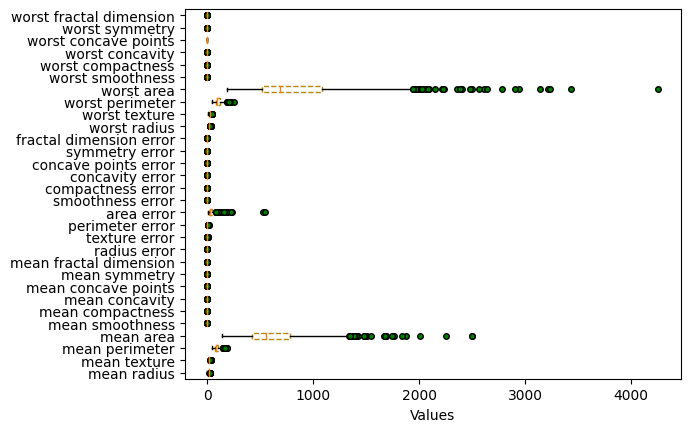

In [164]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
categories = data.feature_names

fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(c_data, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

圖表觀察 :

從以上的盒鬚圖可知，「worst area」和「mean area」值的尺度範圍大，前者從最小值200多到最大值4000多，後者的值的尺度範圍也橫跨2500多，和其他變數值的尺度差很多，因此此數據需要標準化，不然會影響尺度小但可能同樣重要的變數。

標準化

程式碼說明 :　
1. 獲取特徵名稱。
2. 創建一個新的 matplotlib 圖形和軸。
3. 定義箱形圖和異常值的視覺屬性。
4. 使用 ax.boxplot 繪製每個特徵的箱形圖，並將其標籤設為相應的特徵名稱。箱形圖是水平的（vert = False）。
5. 設置 x 軸的標籤為 'Values'。
6. 使用標準化數據(c_data_)

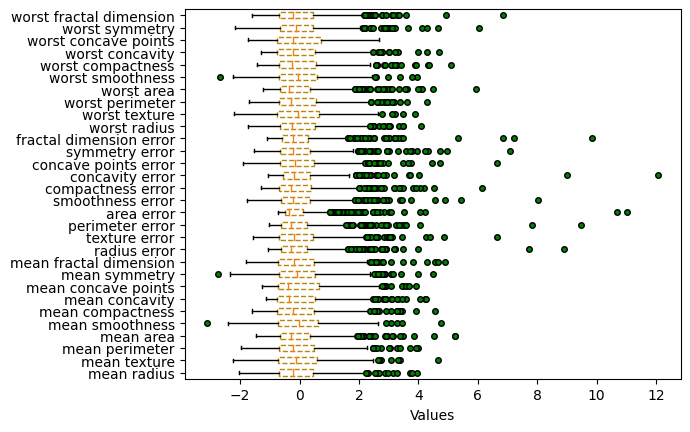

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
categories = data.feature_names

fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', markersize = 4, linestyle = 'none')
ax.boxplot(c_data_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

圖表觀察 :

標準化後，可以從圖表觀察到，所有變數都在共同尺度上進行的，所有變數的平均值大約都落在0上，可以進行PCA。

### 3. 進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot。

程式碼說明 : 

1. 計算標準化後的數據集的共變異數矩陣 Sx。這裡使用了 numpy 的 np.cov 函數，並且設置 bias=False 來進行無偏估計。

2. 手動計算共變異數矩陣 Sx_formula。首先計算樣本數 N 和樣本的平均值 mu_x，然後計算樣本與平均值的差 Tmp，最後用 Tmp 的轉置與 Tmp 的矩陣乘積除以 N-1 得到共變異數矩陣。

3. 計算共變異數矩陣的特徵值和特徵向量 w, v，並對特徵值進行降序排序，得到排序後的特徵值 eigvals 和對應的特徵向量 eigvecs。

4. 重新構造共變異數矩陣 Sigma_x，這裡使用了特徵向量矩陣、特徵值的對角矩陣和特徵向量矩陣的轉置的矩陣乘積。

5. 繪製 Scree plot，顯示每個主成分的特徵值。

6. 繪製 Variance Explained 圖表，顯示每個主成分解釋的變異數比例和累積解釋的變異數比例

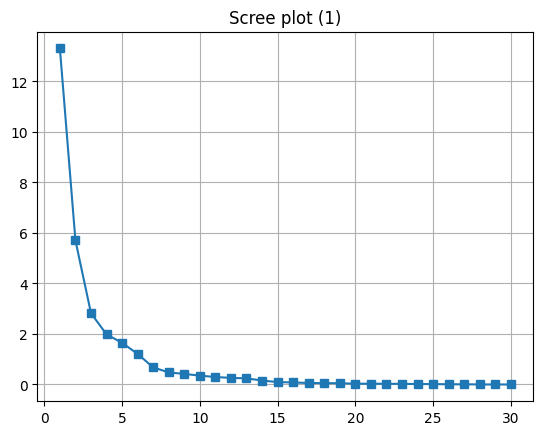

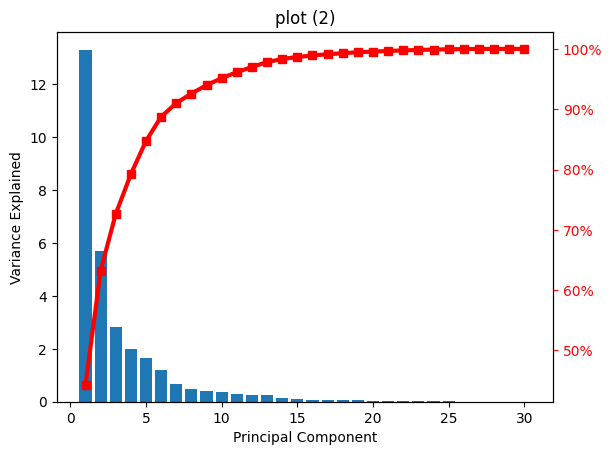

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import PercentFormatter

# Compute the covariance matrix
Sx = np.cov(c_data_.T, bias=False)

# Compute the eigenvalues and eigenvectors
w, v = eig(Sx)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(-w)
eigvals = w[idx]
eigvecs = v[:, idx]

# Plot the eigenvalues
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot (1)')
plt.grid(True)
plt.show()

# Plot the cumulative variance explained
fig, ax = plt.subplots()
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_title('plot (2)')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

圖表觀察 : 

1. Scree plot 是一種用於主成分分析，用於展示每個主成分解釋的變異數。在這個圖中，主成分按照他們的解釋變異數大小排序，並且繪製在 y 軸上，x 軸則是主成分的數量。由 Scree plot (1) 可知前幾個主成分解釋了大部分的變異數，然後後面幾個主成分的解釋變異數迅速下降，形成一個彎曲的形狀。

2. 由 Scree plot (2) 可已看到累積的解釋變異數，一開始的主成分解釋了大部分的變異數，因此紅線急速上升，然後漸漸變得平緩。

### 4. 每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察「做與不做」標準化的差別。

分別定義出主成分['z1']和主成分['z2']

In [173]:
# 假設 eigvecs 是一個二維數組，其中每一列是一個主成分
principal_components = {f'z{i+1}': eigvecs[:, i] for i in range(eigvecs.shape[1])}

print(principal_components['z1'])
print(eigvecs[:, 0])
print(principal_components['z2'])
print(eigvecs[:, 1])


[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -

未標準化

程式碼說明:
1. 使用 @ 運算符（在 NumPy 中表示矩陣乘法）將原始數據 c_data 投影到第一主成分 z1 和第二主成分 z2 上。結果分別存儲在 projected_data_z1 和 projected_data_z2 中。
2. 使用 plt.scatter 繪製散點圖，其中 x 軸是投影到第一主成分的數據，y 軸是投影到第二主成分的數據。

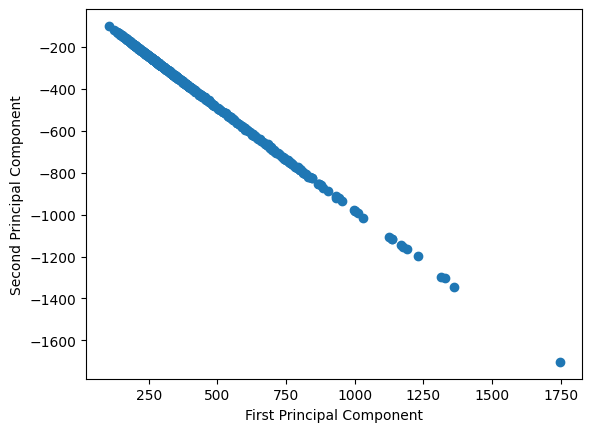

In [172]:
import matplotlib.pyplot as plt

# 將原始數據投影到主成分所定義的新空間中
projected_data_z1 = c_data @ principal_components['z1']
projected_data_z2 = c_data @ principal_components['z2']

# 繪製分群結果，使用原始標籤作為顏色
plt.scatter(projected_data_z1, projected_data_z2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

圖表觀察 : 
在圖表上完全看不出分群的狀況，都擠在一條線上，原因是因為資料未標準化，某些數值的尺度太大了，影響其他變數的重要性，這就是為什麼要標準化。

標準化

程式碼說明:
1. 使用 @ 運算符（在 NumPy 中表示矩陣乘法）將原始數據 c_data_ 投影到第一主成分 z1 和第二主成分 z2 上。結果分別存儲在 projected_data_z1_ 和 projected_data_z2_ 中。
2. 使用 plt.scatter 繪製散點圖，其中 x 軸是投影到第一主成分的數據，y 軸是投影到第二主成分的數據。
3. 使用標準化後的c_data_數據

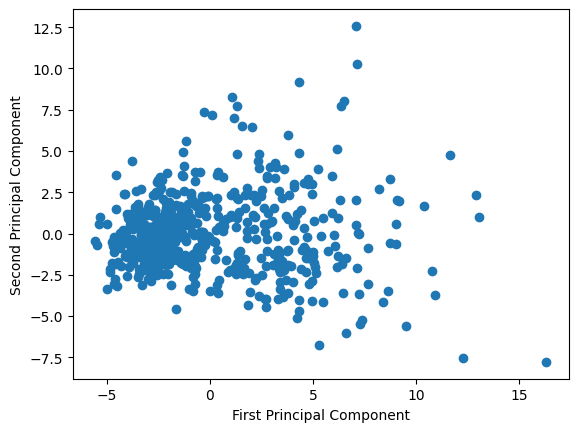

In [171]:
import matplotlib.pyplot as plt

# 將原始數據投影到主成分所定義的新空間中
projected_data_z1_ = c_data_ @ principal_components['z1']
projected_data_z2_ = c_data_ @ principal_components['z2']

# 繪製分群結果，使用原始標籤作為顏色
plt.scatter(projected_data_z1_, projected_data_z2_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()  

圖表觀察:
從圖表上看不太出來分群的狀況，但已經比剛剛的未標準化數據畫出來的散佈圖好很多了，大致能透過x=0這條線分成兩群。

使用 sklearn.decomposition 的 PCA 套件

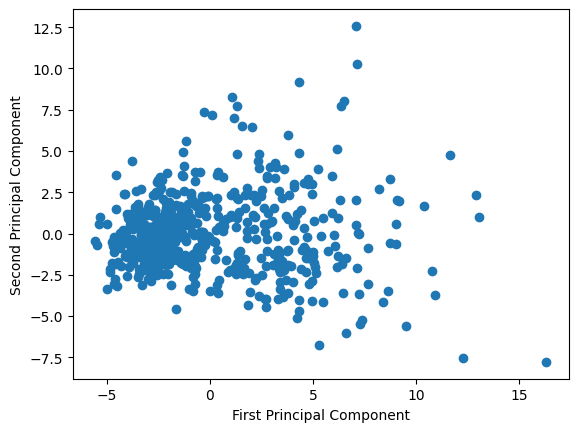

In [169]:
from sklearn.decomposition import PCA

# Initialize a PCA object
pca = PCA(n_components=2)

# Fit and transform the data
Z = pca.fit_transform(c_data_)

# Plot the results
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### 5. 再依據每筆資料的標籤，在散佈圖上塗上不同顏色（參考上題的圖）。


程式碼解釋 : 

1. labels = data.target：從資料集中取出目標標籤。
2. colors = ['blue' if label == 0 else 'red' for label in labels]：根據標籤值創建一個顏色列表，如果標籤為0，顏色為藍色，否則為紅色。
3. plt.scatter(projected_data_z1_, projected_data_z2_, c=colors)：繪製散點圖，其中 projected_data_z1_ 和 projected_data_z2_ 是散點的 x 和 y 座標，c=colors 指定每個點的顏色。
4. plt.legend手動添加圖例，藍色代表 'malignant'，紅色代表 'benign'。
5. Malignant（惡性腫瘤）以藍色表示，Benign（良性腫瘤）以紅色表示。
6. 選用主成分一和二。

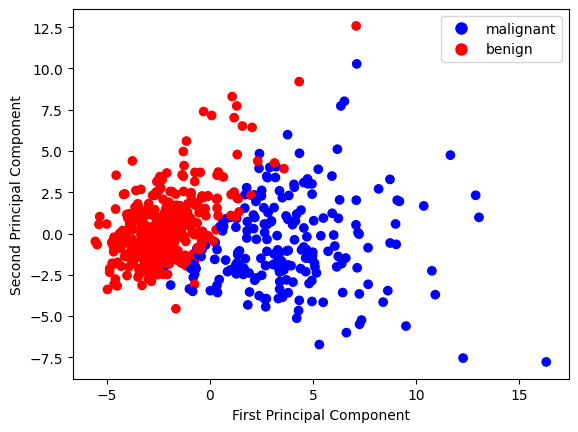

In [174]:
import matplotlib.pyplot as plt

labels = data.target

# Define your own colors
colors = ['blue' if label == 0 else 'red' for label in labels]

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z1_, projected_data_z2_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

圖表觀察 : 

從此張散佈圖可以發現，Malignant 和 Benign 的分群狀況還算可以，只有兩群中間的幾筆資料交錯，但是仍可以更好，或許是只從2D的角度看還不夠，所以在後面將繪製立體圖以找到個好的角度來分辨別。

程式碼說明 : 
1. 選用數據在第二主成分和第三主成分上的投影(projected_data_z2_, projected_data_z3_)
2. 將 c_data_ 數據與 principal_components['z3'] 進行乘法運算，找出數據在第三主成分上的投影。

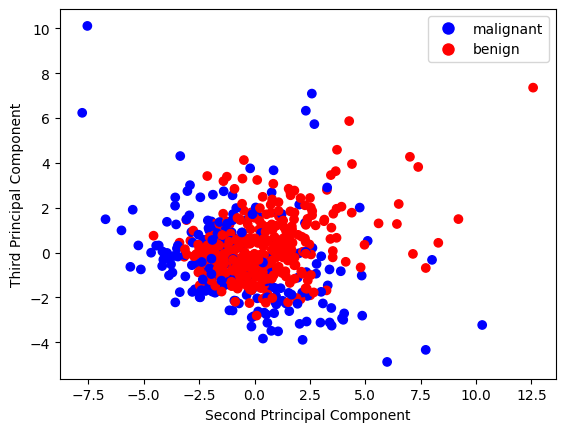

In [175]:
projected_data_z3_ = c_data_ @ principal_components['z3']

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z2_, projected_data_z3_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

plt.xlabel('Second Ptrincipal Component')
plt.ylabel('Third Principal Component')
plt.show()

圖表觀察 : 
從圖表可以發現，當選用數據在第二主成分和第三主成分上的投影，兩群資料就擠在一起，毫無分散可言。

程式碼說明 : 
1. 選用數據在第一主成分和第四主成分上的投影(projected_data_z1_, projected_data_z4_)
2. 將 c_data_ 數據與 principal_components['z4'] 進行乘法運算，找出數據在第四主成分上的投影。

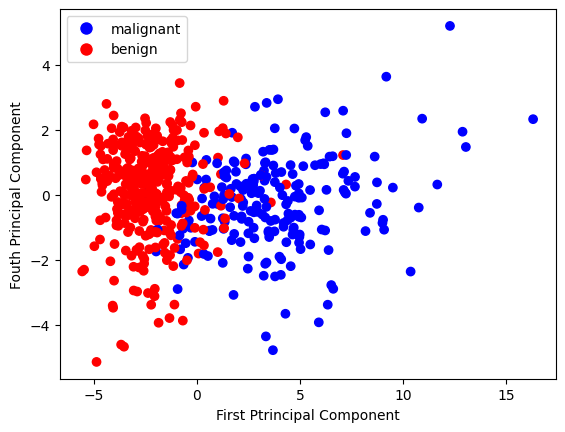

In [176]:
projected_data_z4_ = c_data_ @ principal_components['z4']

# 繪製分群結果，使用自定義的顏色
plt.scatter(projected_data_z1_, projected_data_z4_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

plt.xlabel('First Ptrincipal Component')
plt.ylabel('Fouth Principal Component')
plt.show()

圖表觀察 : 
從圖表可以發現，當選用數據在第一主成分和第四主成分上的投影，兩群資料的分散性比使用二三主成分好很多，說明了第一主成分的能量很大，辨識度很強。


### 6. 如果採三個主成分，則可繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野。


程式碼說明 : 
1. 從 mpl_toolkits.mplot3d 模組中導入 Axes3D，用於創建3D圖形。
2. projected_data_z3_ = c_data_ @ principal_components['z3']：計算第三主成分的投影數據。
3. ax = fig.add_subplot(111, projection='3d')：在圖形上創建一個3D子圖。

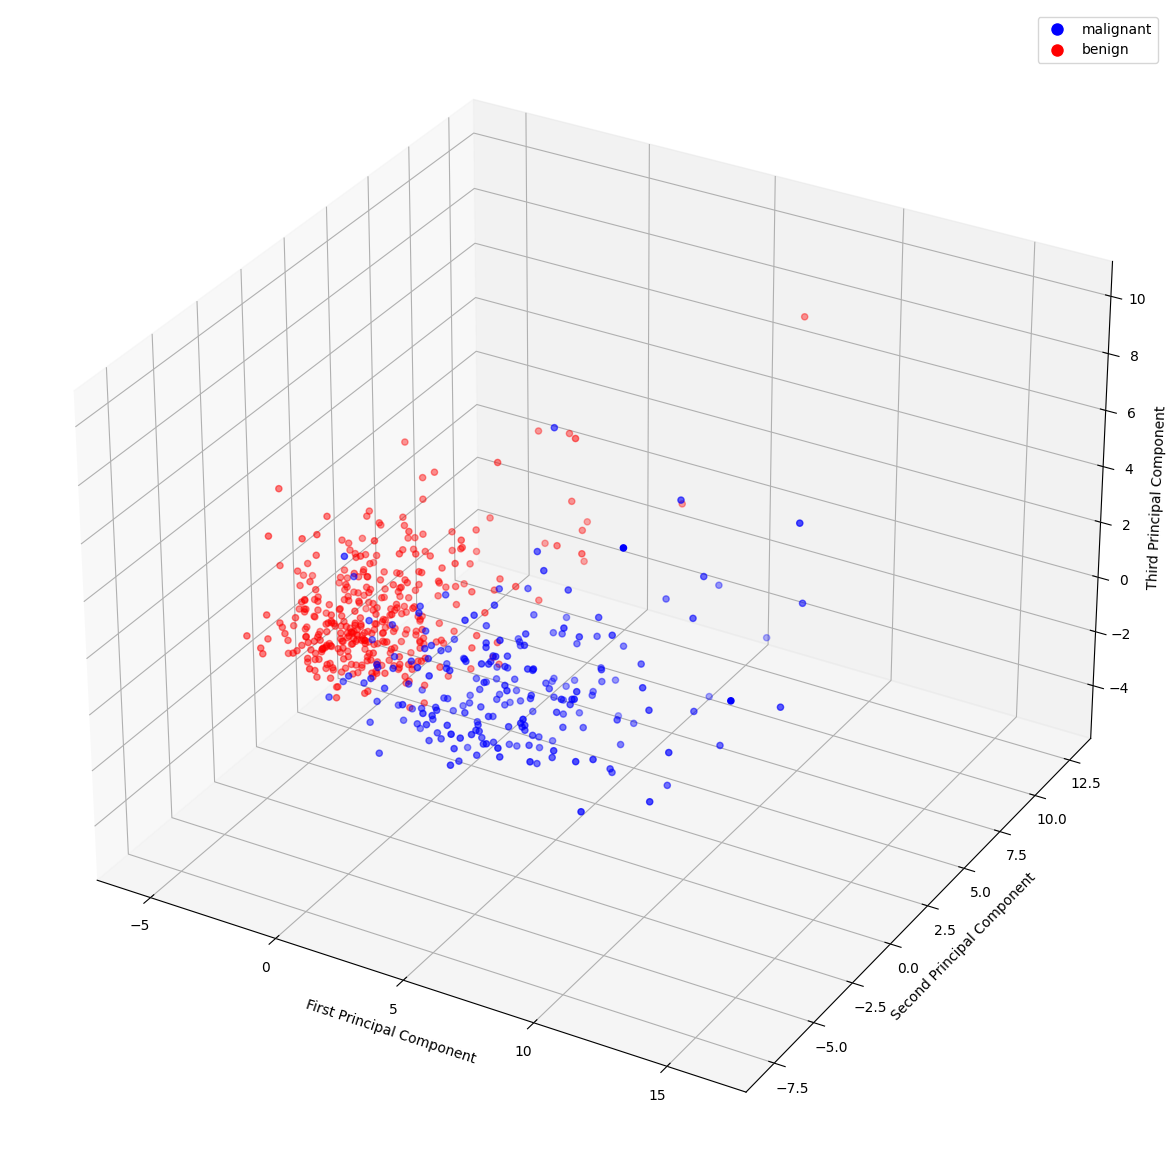

In [81]:
from mpl_toolkits.mplot3d import Axes3D

projected_data_z3_ = c_data_ @ principal_components['z3']
labels = data.target 

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
 
# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

圖表觀察 : 

透過此張立體圖，可以更好的去辨別，但還須調整視角。

更換不同視角來辨別

仰角20度，方位角45度

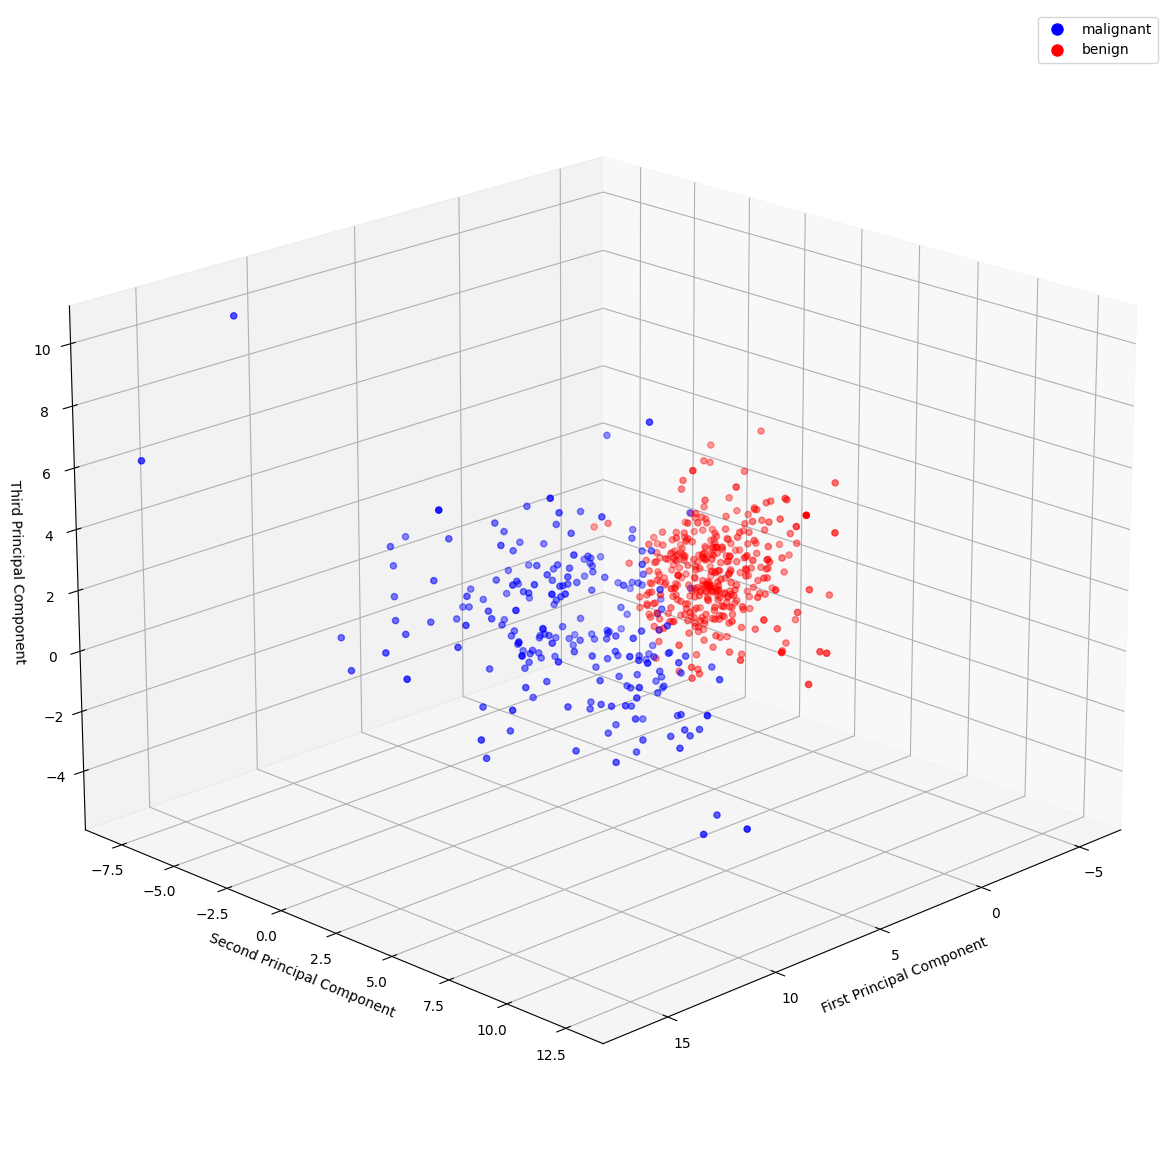

In [82]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D

projected_data_z3_ = c_data_ @ principal_components['z3']
labels = data.target 

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
 
# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 改變視角
ax.view_init(elev=20, azim=45)  # elev是仰角，azim是方位角

plt.show()

仰角120度，方位角90度

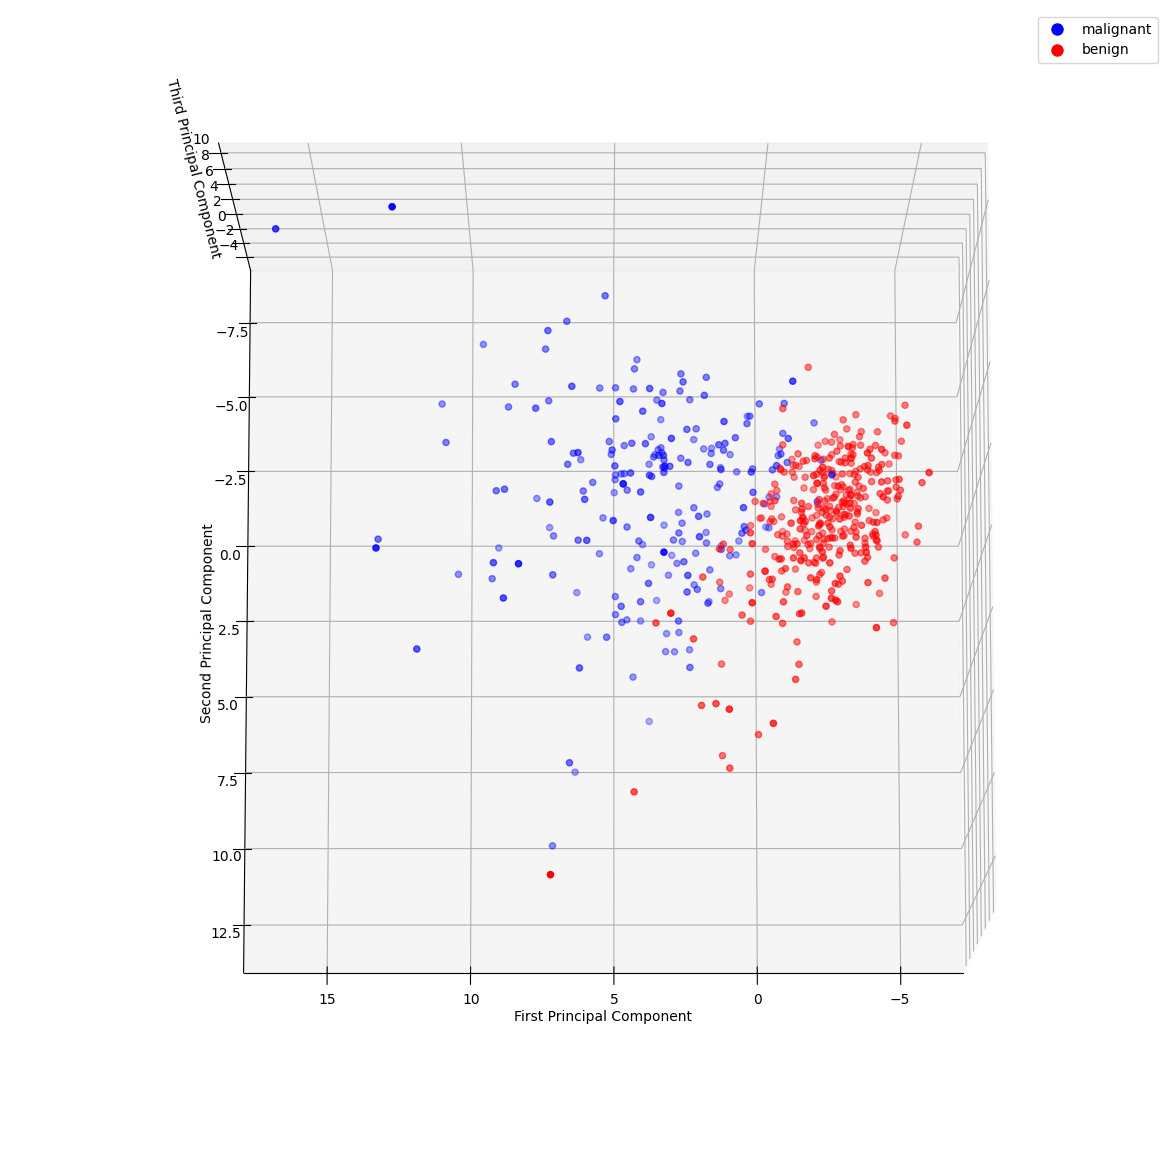

In [106]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D

projected_data_z3_ = c_data_ @ principal_components['z3']
labels = data.target 

# 創建一個3D子圖
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
 
# 繪製分群結果
ax.scatter(projected_data_z1_, projected_data_z2_, projected_data_z3_, c=colors)

# Add legend manually
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
           labels=['malignant', 'benign'])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 改變視角
ax.view_init(elev=80, azim=90)  # elev是仰角，azim是方位角

plt.show()

圖表觀察 :
在嘗試各種角度後，選定仰角80度，方位角90度，是嘗試的過程中最可以分辨'malignant'和'benign'的角度


### 7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

先印出z1和z2中的組成係數

In [109]:
# 假設 eigvecs 是一個二維數組，其中每一列是一個主成分
principal_components = {f'z{i+1}': eigvecs[:, i] for i in range(eigvecs.shape[1])}

print("z1 : " + str(principal_components['z1']))
# print(eigvecs[:, 0])
print("z2 : " + str(principal_components['z2']))
# print(eigvecs[:, 1])

z1 : [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
z2 : [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


z1 是第一主成分，它的組成係數（即特徵向量的元素）表示原始數據在這個主成分上的投影。這些係數的絕對值越大，表示該原始特徵對該主成分的貢獻越大，即該特徵在該主成分上的變異性越大。因此組成係數的絕對值越大，表示對應的原始特徵在 z1 上的變異性越大，也就是說，這個特徵對 z1 的貢獻越大。也就是0.26085376這個數值。在z2中就是0.36657547這個數值。

接著找出z1和z2最重要和最不重要的元素。

In [110]:

z1_index = np.argmax(np.abs(principal_components['z1']))
z2_index = np.argmax(np.abs(principal_components['z2']))

z1_index_min = np.argmin(np.abs(principal_components['z1']))
z2_index_min = np.argmin(np.abs(principal_components['z2']))


print(f"The most important feature for 'z1' is {data.feature_names[z1_index]} with value {principal_components['z1'][z1_index]}.")
print(f"The most important feature for 'z2' is {data.feature_names[z2_index]} with value {principal_components['z2'][z2_index]}.")

print(f"The least important feature for 'z1' is {data.feature_names[z1_index_min]} with value {principal_components['z1'][z1_index_min]}.")
print(f"The least important feature for 'z2' is {data.feature_names[z2_index_min]} with value {principal_components['z2'][z2_index_min]}.")

The most important feature for 'z1' is mean concave points with value 0.26085375838574026.
The most important feature for 'z2' is mean fractal dimension with value 0.3665754713782565.
The least important feature for 'z1' is smoothness error with value 0.014531452147837461.
The least important feature for 'z2' is worst concave points with value -0.008257235069545074.


再與原變數間的相關係數對照，是否透露相同的訊息(設定相關係數大於0.6為相關性強，設定相關係數小於0.3為相關性弱)


In [178]:
import pandas as pd
import numpy as np

# Assuming that `df` is your DataFrame and "mean_concave_points" is the column of interest
correlation_cp = np.abs(df.corr()["mean concave points"])
correlation_fd = np.abs(df.corr()["mean fractal dimension"])

print("z1的最重要原變數與其他原變數之間相關係數絕對值大於等於0.6的數量"+str(np.sum(correlation_cp>=0.6)))
print("z2的最重要原變數與其他原變數之間相關係數絕對值大於等於0.6的數量"+str(np.sum(correlation_fd>=0.6)))

print("z1的最重要原變數與其他原變數之間相關係數絕對值小於0.3的數量"+str(np.sum(correlation_cp<=0.6)))
print("z2的最重要原變數與其他原變數之間相關係數絕對值小於0.3的數量"+str(np.sum(correlation_fd<=0.6)))

z1的最重要原變數與其他原變數之間相關係數絕對值大於等於0.6的數量16
z2的最重要原變數與其他原變數之間相關係數絕對值大於等於0.6的數量3
z1的最重要原變數與其他原變數之間相關係數絕對值小於0.3的數量14
z2的最重要原變數與其他原變數之間相關係數絕對值小於0.3的數量27


1. mean concave points 是z1的最重要原變數而他的相關係數大於等於0.6的數量16，小於0.3的數量14，代表和其他原變數之間的相關性算強。
2. mean fractal dimension 是z2的最重要原變數而他的相關係數大於等於0.6的數量只有3，小於0.3的數量27，代表和其他原變數之間的相關性很弱。

In [179]:
import pandas as pd
# print(df.columns)
correlation_se = np.abs(df.corr()["smoothness error"])
correlation_wsp = np.abs(df.corr()["worst concave points"])
print("z1的最不重要原變數與其他原變數之間相關係數絕對值大於0.6的數量"+str(np.sum(correlation_se>=0.6)))
print("z2的最不重要原變數與其他原變數之間相關係數絕對值大於0.6的數量"+str(np.sum(correlation_wsp>=0.6)))

print("z1的最不重要原變數與其他原變數之間相關係數絕對值小於0.3的數量"+str(np.sum(correlation_se<0.3)))
print("z2的最不重要原變數與其他原變數之間相關係數絕對值小於0.3的數量"+str(np.sum(correlation_wsp<0.3)))

z1的最不重要原變數與其他原變數之間相關係數絕對值大於0.6的數量1
z2的最不重要原變數與其他原變數之間相關係數絕對值大於0.6的數量13
z1的最不重要原變數與其他原變數之間相關係數絕對值小於0.3的數量21
z2的最不重要原變數與其他原變數之間相關係數絕對值小於0.3的數量6


1. smoothness error 是z1的最不重要原變數而他的相關係數絕對值大於等於0.6的數量1，小於0.3的數量13，代表和其他原變數之間的相關性算很弱。
2. worst concave points 是z2的最不重要原變數而他的相關係數絕對值大於等於0.6的數量有21，小於0.3的數量6，代表和其他原變數之間的相關性算強。


猜測:主成分中的原變數的重要性，和與其他原變數之間的相關性，兩者之間並沒有實際關聯性

教學與參考網頁 : <br>
[汪群超 Chun-Chao Wang教授的個人網頁](https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/)

[Day29 主成分分析(Principal Components Analysis, PCA)](https://ithelp.ithome.com.tw/articles/10306805?sc=pt#:~:text=%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90%20%28Principal%20Components%20Analysis%2C,PCA%29%EF%BC%8C%E6%8C%87%E8%A8%88%E7%AE%97%E4%B8%BB%E6%88%90%E5%88%86%E4%BB%A5%E5%8F%8A%E4%BD%BF%E7%94%A8%E4%B8%BB%E6%88%90%E5%88%86%E4%BE%86%E5%88%86%E6%9E%90%E8%B3%87%E6%96%99%E7%9A%84%E9%81%8E%E7%A8%8B%EF%BC%8C%E5%B1%AC%E6%96%BC%E4%B8%80%E7%A8%AE%20%E9%99%8D%E4%BD%8E%E7%B6%AD%E5%BA%A6%20%28dimension%20reductoin%29%20%E7%9A%84%E7%B5%B1%E8%A8%88%E6%96%B9%E6%B3%95%EF%BC%8C%E5%88%A9%E7%94%A8%E8%BC%83%E5%B0%91%E7%9A%84%E8%AE%8A%E6%95%B8%E4%BE%86%E4%BB%A3%E8%A1%A8%E5%8E%9F%E6%9C%AC%E8%B3%87%E6%96%99%E5%A4%A7%E9%83%A8%E5%88%86%E7%9A%84%E8%A8%8A%E6%81%AF%E3%80%82)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

參考影片 :<br> https://youtu.be/DSS7MmhXjr8?si=u7nVFRDnvfBlfagN